# **Tarea 15**
## Análisis de datos
### **Ana Isabel Moreno Hernández**

------------------------------------

Importamos librerías necesarias:

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Descargamos los datos: 

In [2]:
file = pd.read_csv('result.txt')

__________________________________________________

**Función para generar números aleatorios con distribución uniforme(randoms)**

In [3]:
def transform(dec, ra):
    dec = dec*math.pi/180
    ra = ra*math.pi/180
    x = np.sin(dec)*np.cos(ra) # Transforma a coordenadas cartesianas
    y = np.sin(ra)*np.sin(dec)
    z = np.cos(dec)
    return x, y, z


def Random(dec, ra, nr):
    dec_r = np.random.uniform(min(dec), max(dec), nr)
    ra_r = np.random.uniform(min(ra), max(ra), nr)
    x, y, z = transform(dec_r, ra_r)
    return x, y, z

Graficamos nuestra distribución de datos utilizados:

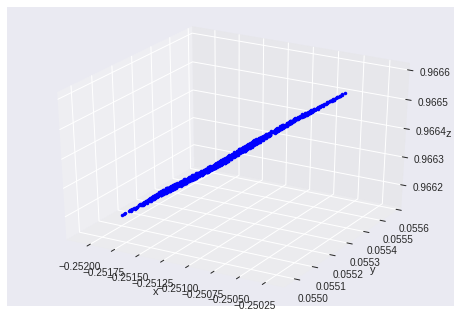

In [4]:
x, y, z = transform(file['dec'][0:1000], file['ra'][0:1000])

from mpl_toolkits import mplot3d

plt.style.use('seaborn') # Estilo

ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, '.b');
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z');

Probamos la función Random:

In [5]:
xrand, yrand, zrand = Random(file['dec'][0:1000],file['ra'][0:1000], 1000) # Seleccionamos 1000 datos y generamos 1000 coordenadas.

Graficamos para observar si están uniformemente distribuidos:

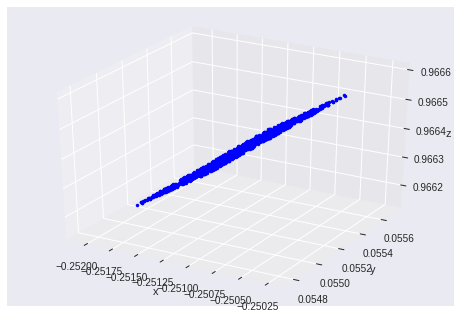

In [6]:
plt.style.use('seaborn') # Estilo

ax = plt.axes(projection='3d')
ax.plot3D(xrand, yrand, zrand, '.b');
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z');

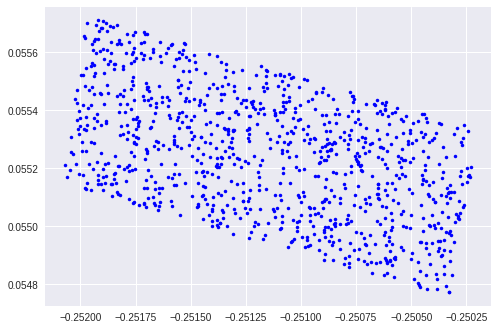

In [7]:
plt.plot(xrand,yrand, '.b')

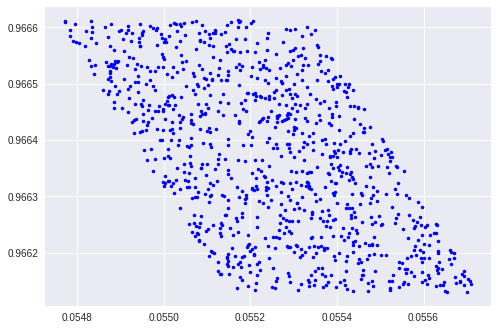

In [8]:
plt.plot(yrand, zrand, '.b')

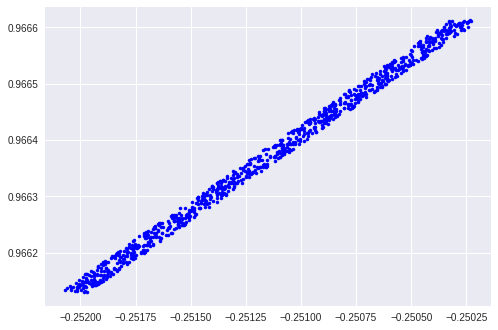

In [9]:
plt.plot(xrand, zrand, '.b')

-----------------------

**Funciones para obtener los histogramas.**

Anteriormente guardamos las distancias en arreglos, lo cual no era muy conveniente. Tratamos de resolver el problema llenando el histograma dentro del ciclo. 

Para llenar un histograma dentro de un ciclo, utilizamos physt.

In [10]:
# Librerías necesarias
import physt
from physt import h1, h2, histogramdd

%matplotlib inline

Checamos si funciona:

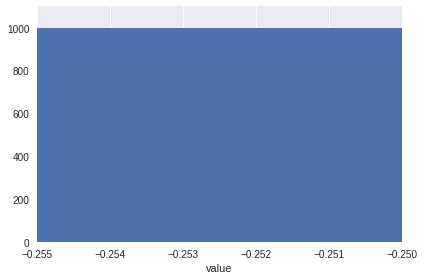

In [11]:
# Creamos un histograma vacío.
h = h1(None, "fixed_width", bin_width=0.005, name="Prueba", axis_name="value", adaptive=True)

for i in range(len(xrand)):
    h.fill(xrand[i])

h.plot()

Y sí es uniforme, tal y como lo esperábamos. 

Ahora probamos| una de nuestras funciones para saber si funciona este llenado.

In [12]:
def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)

# Esto es para DD
def dede(p, datos, bin_width):
    #h = h1(None, "fixed_width", bin_width=bin_width, name="dd", axis_name="value", adaptive=True) # Empty histogram
    dis = []
    n = 0
    for i in range(len(p)):
        M = np.linalg.norm(p[i]-p[n:],axis=1)
        dis.extend(M[M!=0])
        n = n+1
    vec = np.array(dis)
    return plt.hist(vec)

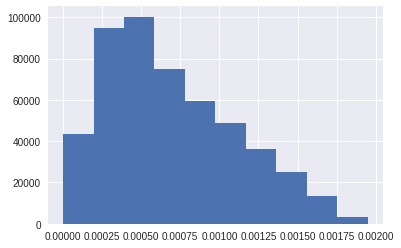

In [13]:
h = dede(np.array([xrand,yrand,zrand]).T, len(xrand), 0.0003)

------------------------------------------

**Funciones para calcular la correlación.**

In [333]:
def distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)

# Esto es para DD
def dede(p, datos, bin_width):
    h = h1(None, "fixed_width", bin_width=bin_width, name="dd", axis_name="value", adaptive=True) # Empty histogram
    for i in range(datos):
        for j in range(i+1, datos):
            h.fill(distance(p[i],p[j]))
    return h

# Esto es para DR
def der(p, p_rand, datos, datos_rand, bin_width):
    h = h1(None, "fixed_width", bin_width=bin_width, name="dd", axis_name="value", adaptive=True) # Empty histogram
    for i in range(datos):
        for j in range(datos_rand):         
            h.fill(distance(p[i],p_rand[j]))
    return h

# Esto es para RR, que es la misma función para DD, pero la incluímos para obtener la correlación.
def rere(p_rand, datos_rand, bin_width):
    h = h1(None, "fixed_width", bin_width=bin_width, name="dd", axis_name="value", adaptive=True) # Empty histogram
    for i in range(datos_rand):
        for j in range(i+1, datos_rand):         
            h.fill(distance(p_rand[i],p_rand[j]))
    return h

#función de correlación
def correlation(p,p_rand, datos, datos_rand, bin_width):
    dd_h = dede(p, datos, bin_width)
    dr_h = der(p, p_rand, datos, datos_rand, bin_width)
    rr_h = rere(p_rand, datos_rand, bin_width)
    return dd_h, dr_h, rr_h

Aunque la función *correlation* nos ayuda a generar los histogramas, es útil definir una función que los grafique en conjunto. 

In [334]:
def plot(p, p_rand, datos, datos_rand, bin_width):
    dd, dr, rr = correlation(p, p_rand, datos, datos_rand, bin_width) # Llamamos a correlation
    axis = dd.plot(label="DD", color="green", alpha=0.3)
    dr.plot(label="DR", color="red", alpha=0.3, ax=axis) # Unimos las gráficas para que estén en el mismo canvas
    rr.plot(label="RR", color="blue", alpha=0.3, ax=axis)
    axis.legend()
    return dd.plot, dr.plot, rr.plot # Graficamos todo

Finalmente, definimos las funciones que calculan la correlación. Definiremos tres diferentes:

In [335]:
def simple_corr(p, p_rand, datos, datos_rand, bin_width):
    dd, dr, rr = correlation(p, p_rand, datos, datos_rand, bin_width) # Llamamos a correlation
    dd_c = dd.frequencies # Calculamos frecuencias
    rr_c = rr.frequencies
    dr_c = dr.frequencies #print(dd_c, rr_c, dr_c)
    nd = datos*(datos-1)/2 # Calculamos factores de normalización
    nr = datos_rand*(datos_rand-1)/2
    ndr = datos*datos_rand
    return (dd_c/rr_c) -1, ((dd_c)-2*(dr_c)+(rr_c))/(rr_c), ((dd_c/nd)-2*(dr_c/ndr)+(rr_c/nr))/(rr_c/nr) 

----------------------------

**Pruebas**

Para saber si este programa funciona, generamos dos muestras de números aleatorios distribuidos uniformemente. 

In [336]:
xrand1, yrand1, zrand1 = Random(file['dec'][0:1000],file['ra'][0:1000], 1000) # Seleccionamos 1000 datos y generamos 1000 coordenadas.

In [337]:
xrand2, yrand2, zrand2 = Random(file['dec'][0:1000],file['ra'][0:1000], 1000) # Seleccionamos 1000 datos y generamos 1000 coordenadas.

Verificamos que las muestras son diferentes.

In [338]:
#xrand1 == xrand2

Ploteamos los histogramas utilizando la función definida 'plot'

(<physt.plotting.PlottingProxy at 0x7fc9df0b5210>,
 <physt.plotting.PlottingProxy at 0x7fc9d78adcd0>)

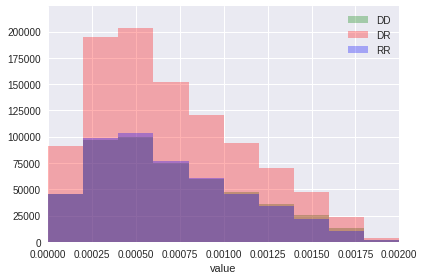

In [339]:
plot(np.array([xrand1, yrand1, zrand1]).T, np.array([xrand2, yrand2, zrand2]).T, len(xrand1), len(xrand2), 0.0002)

Calculamos la correlación:

In [27]:
results = simple_corr(np.array([xrand1, yrand1, zrand1]).T, np.array([xrand2, yrand2, zrand2]).T, len(xrand1), len(xrand2), 0.0002)

In [28]:
results

(array([ 0.0048396 , -0.01588097, -0.01573474, -0.03515034, -0.01993841,
         0.02324868,  0.05500794,  0.07093157,  0.13143303,  0.39556004]),
 array([-2.0091722 , -1.97114974, -1.976632  , -1.97181965, -1.98650665,
        -2.03792991, -2.07997919, -2.10457597, -2.18734869, -2.31079717]),
 array([-0.00015929,  0.00846228,  0.00579707, -0.00151666, -0.00123925,
        -0.00531002, -0.01041813, -0.01473445, -0.02579844,  0.04473461]))

En estos tres arreglos se muestran las tres diferentes formas de calcular la correlación. results[0] es (dd_c/rr_c) -1, results[1] ((dd_c)-2*(dr_c)+(rr_c))/(rr_c) y results[3] ((dd_c/nd)-2*(dr_c/ndr)+(rr_c/nr))/(rr_c/nr),  

Notamos que results[0] y results[3] son los más cercanos a cero. 

---------------------------

Ahora probamos nuestro código con los datos originales. 

**Correlación**

Seleccionamos 1000 datos de nuestra muestra:

In [35]:
ra = file['ra'][0:1000]
dec = file['dec'][0:1000]

In [36]:
xrand1, yrand1, zrand1 = Random(ra,dec,1000) # Seleccionamos 1000 datos y generamos 1000 coordenadas.

In [37]:
x, y, z = transform(ra,dec)

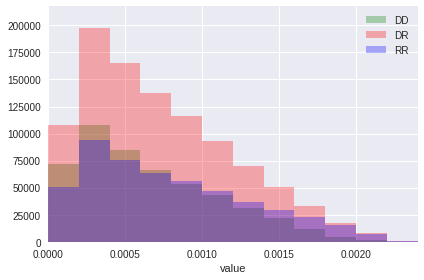

In [38]:
plot(np.array([x, y, z]).T, np.array([xrand1, yrand1, zrand1]).T, len(x), len(xrand1), 0.0002)
plt.savefig('result.png')

In [39]:
results = simple_corr(np.array([x, y, z]).T, np.array([xrand1, yrand1, zrand1]).T, len(x), len(xrand1), 0.0002)

In [40]:
results

(array([ 0.42820422,  0.1511493 ,  0.11889619,  0.03200562, -0.05309215,
        -0.07924112, -0.1458667 , -0.26089626, -0.46197382, -0.70659711,
        -0.73924471, -0.76744186]),
 array([-1.83513268, -2.06003599, -2.24419204, -2.27692908, -2.20110987,
        -2.04813038, -1.95099769, -1.73323784, -1.40564202, -1.06055603,
        -1.0510444 , -0.93255814]),
 array([ 0.29866744,  0.04766225, -0.06046638, -0.12030726, -0.125027  ,
        -0.06170131, -0.04652963,  0.00466912,  0.06766391,  0.11760041,
         0.10601134,  0.15108256]))

In [45]:
bins = np.linspace(0, 0.0026, 12)

In [46]:
bins

array([0.        , 0.00023636, 0.00047273, 0.00070909, 0.00094545,
       0.00118182, 0.00141818, 0.00165455, 0.00189091, 0.00212727,
       0.00236364, 0.0026    ])

In [49]:
len(results[0])

12

Graficamos la correlación:

Text(0.5, 0, 'r')

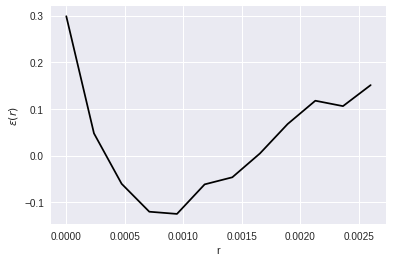

In [57]:
plt.plot(bins, results[2], '-k')
plt.ylabel('$\epsilon (r)$')
plt.xlabel('r')

-------------------------

**Redefinición de las funciones de correlación.** 

Dado que nuestras funciones de correlación tardan demasiado en compilar, redefiniremos éstas para optimizar nuestro código. 

In [26]:
# Esto es para DD
def dede(p, bins):
    dis = []
    n = 0
    for i in range(len(p)):
        M = np.linalg.norm(p[i]-p[n:],axis=1)
        dis.extend(M[M!=0])
        n = n+1
    return plt.hist(np.array(dis), bins=bins, label = 'DD',alpha =0.5)

# Esto es para DR
def der(p, p_rand, bins):
    dis = []
    for i in range(len(p)):
        M = np.linalg.norm(p[i]-p_rand,axis=1)
        dis.extend(M)
    return plt.hist(np.array(dis), bins = bins, label = 'DR', alpha = 0.5)


# Esto es para RR, que es la misma función para DD, pero la incluímos para obtener la correlación.
def rere(p_rand, bins):
    dis = []
    n = 0
    for i in range(len(p_rand)):
        M = np.linalg.norm(p_rand[i]-p_rand[n:],axis=1)
        dis.extend(M[M!=0])
        n = n+1
    return plt.hist(np.array(dis), bins=bins, label = 'RR', alpha = 0.5)

#función de correlación
def correlation(p,p_rand, bins):
    datos = len(p)
    datos_rand = len(p_rand)
    dd_h = dede(p, bins)
    dr_h = der(p, p_rand, bins)
    rr_h = rere(p_rand, bins)
    dd_c = dd_h[0] # Calculamos frecuencias
    rr_c = rr_h[0]
    dr_c = dr_h[0]
    nd = datos*(datos-1)/2 # Calculamos factores de normalización
    nr = datos_rand*(datos_rand-1)/2
    ndr = datos*datos_rand
    return (dd_c/rr_c) -1, ((dd_c)-2*(dr_c)+(rr_c))/(rr_c), ((dd_c/nd)-2*(dr_c/ndr)+(rr_c/nr))/(rr_c/nr)

In [79]:
def plot(p,p_rand, bins):
    datos = len(p)
    datos_rand = len(p_rand)
    dd_c = dede(p, bins)
    dr_c = der(p, p_rand, bins)
    rr_c = rere(p_rand, bins)
    nd = datos*(datos-1)/2 # Calculamos factores de normalización
    nr = datos_rand*(datos_rand-1)/2
    ndr = datos*datos_rand
    # Para plotear la correlación
    corr = ((dd_c[0]/nd)-2*(dr_c[0]/ndr)+(rr_c[0]/nr))/(rr_c[0]/nr)
    plt.legend()
    plt.show()
    plt.plot(dd_c[1][0:len(corr)], dd_c[1][0:len(corr)]*corr, label = 'Correlación')
    plt.xlabel('r')
    plt.ylabel('$\epsilon(r)*r$')
    plt.legend()
    plt.show()
    return (dd_c[0]/rr_c[0]) -1, ((dd_c[0])-2*(dr_c[0])+(rr_c[0]))/(rr_c[0]), ((dd_c[0]/nd)-2*(dr_c[0]/ndr)+(rr_c[0]/nr))/(rr_c[0]/nr)

-------------------------

# Finalmente lo utilizamos en nuestros datos.

In [294]:
dataPSF = file[file['type'] == 'PSF']

In [295]:
dataPSF

,allmask_g,allmask_r,allmask_z,anymask_g,anymask_r,anymask_z,brickid,brickname,brick_primary,brightstarinblob,...,snr_w4,snr_z,type,w1_w2,w2_w3,w3_w4,wise_coadd_id,wisemask_w1,wisemask_w2,z_w1
2,0,0,0,0,0,0,247637,3474m147,1,0,...,-1.592120,0.000000,PSF,0.241451,1.058830,NaN,3474m152,0,0,Infinity
6,0,0,0,0,0,0,247637,3474m147,1,0,...,5.596550,0.000000,PSF,NaN,NaN,NaN,3474m152,0,0,NaN
8,0,0,0,0,0,0,247637,3474m147,1,0,...,-3.909220,0.000000,PSF,-0.985842,4.282760,NaN,3474m152,0,0,Infinity
12,0,0,0,1,0,0,247637,3474m147,1,0,...,5.694030,0.000000,PSF,NaN,4.981200,2.64082,3474m152,0,0,NaN
13,0,0,0,0,0,0,247637,3474m147,1,0,...,-1.434140,0.000000,PSF,0.152847,1.916730,NaN,3474m152,0,0,Infinity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,0,0,0,0,0,0,247637,3474m147,1,0,...,0.546613,-0.635207,PSF,2.759400,NaN,NaN,3474m152,0,0,NaN
4992,0,0,0,0,0,0,247637,3474m147,1,0,...,-0.925542,0.987927,PSF,0.525482,-0.621887,NaN,3474m152,0,0,2.16156
4993,0,0,0,0,0,0,247637,3474m147,1,0,...,-0.283605,6.151130,PSF,NaN,NaN,NaN,3474m152,0,0,-1.58406
4995,0,0,0,0,0,0,247637,3474m147,1,0,...,-4.539360,3.622270,PSF,NaN,NaN,NaN,3474m152,0,0,NaN


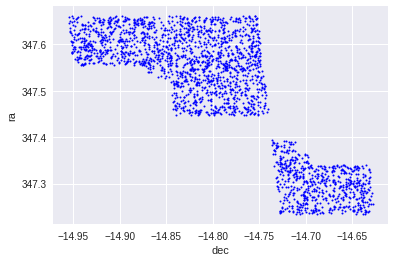

In [296]:
plt.plot(dataPSF['dec'], dataPSF['ra'], 'ob', markersize = 2)
plt.xlabel('dec')
plt.ylabel('ra');

In [297]:
xrand1, yrand1, zrand1 = Random(dataPSF['ra'],dataPSF['dec'],len(dataPSF['ra'])) 
xrand2, yrand2, zrand2 = Random(dataPSF['ra'],dataPSF['dec'],len(dataPSF['ra'])) 

In [298]:
x, y, z = transform(dataPSF['ra'],dataPSF['dec'])

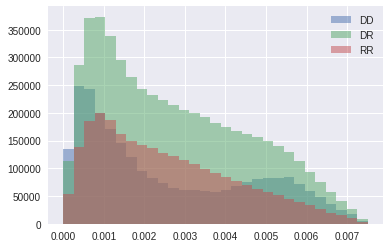

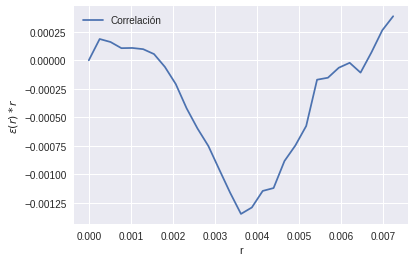

In [299]:
minimo = 0
maximo = 0.0075
bins = np.linspace(minimo, maximo, 30)
h = plot(np.array([x, y, z]).T, np.array([xrand1, yrand1, zrand1]).T, bins)

In [300]:
file['type'].unique()

array(['REX', 'DEV', 'PSF', 'EXP', 'COMP'], dtype=object)

**REX**

In [301]:
dataREX = file[file['type'] == 'REX']

In [302]:
xrand1, yrand1, zrand1 = Random(dataREX['ra'],dataREX['dec'],len(dataREX['ra'])) 
xrand2, yrand2, zrand2 = Random(dataREX['ra'],dataREX['dec'],len(dataREX['ra'])) 

x, y, z = transform(dataREX['ra'],dataREX['dec'])

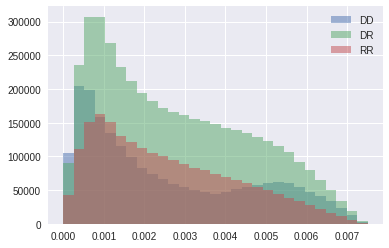

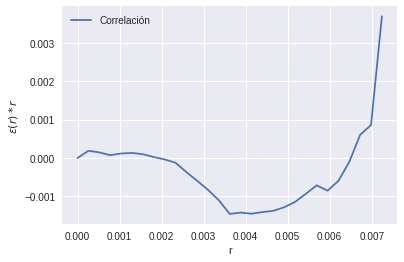

In [303]:
minimo = 0
maximo = 0.0075
bins = np.linspace(minimo, maximo, 30)
h = plot(np.array([x, y, z]).T, np.array([xrand1, yrand1, zrand1]).T, bins)

**DEV**

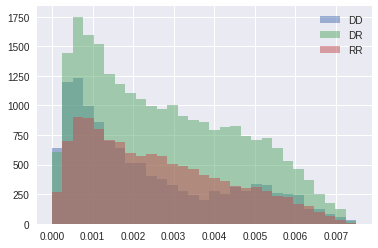

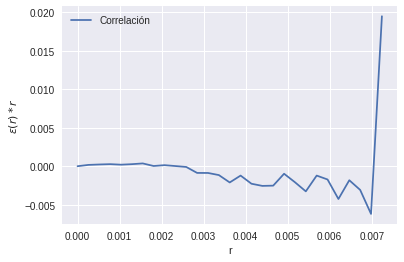

In [304]:
data = file[file['type'] == tipo[1]]
xrand1, yrand1, zrand1 = Random(data['ra'],data['dec'],len(data['ra'])) 
x, y, z = transform(data['ra'],data['dec'])
minimo = 0
maximo = 0.0075
bins = np.linspace(minimo, maximo, 30)
h = plot(np.array([x, y, z]).T, np.array([xrand1, yrand1, zrand1]).T, bins)

**EXP**

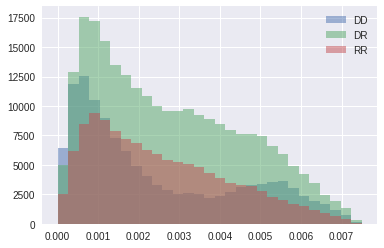

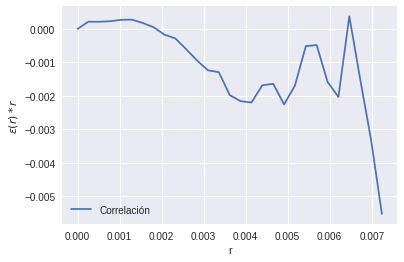

In [332]:
data = file[file['type'] == tipo[3]]
xrand1, yrand1, zrand1 = Random(data['ra'],data['dec'],len(data['ra'])) 
x, y, z = transform(data['ra'],data['dec'])
minimo = 0
maximo = 0.0075
bins = np.linspace(minimo, maximo, 30)
h = plot(np.array([x, y, z]).T, np.array([xrand1, yrand1, zrand1]).T, bins)

**COMP**

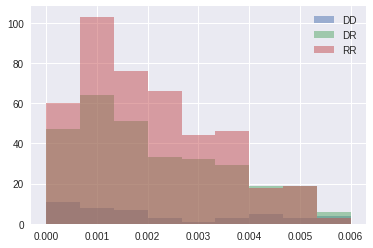

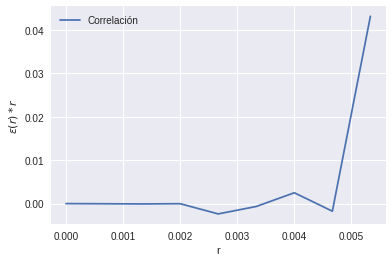

In [306]:
data = file[file['type'] == tipo[4]]
xrand1, yrand1, zrand1 = Random(data['ra'],data['dec'],30) 
x, y, z = transform(data['ra'],data['dec'])
minimo = 0
maximo = 0.006
bins = np.linspace(minimo, maximo, 10)
h = plot(np.array([x, y, z]).T, np.array([xrand1, yrand1, zrand1]).T, bins)

-------------------------

### **Utilizar la librería de astroML.correlation**

- Para una distribución random

In [266]:
import numpy as np
from astroML.correlation import two_point
np.random.seed(0)
X = np.random.random((5000, 2))
bins = np.linspace(0, 1, 20)
corr = two_point(X, bins)
np.allclose(corr, 0, atol=0.02)

True

In [267]:
X

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       ...,
       [0.73550223, 0.55044682],
       [0.39715133, 0.75842952],
       [0.02378743, 0.81357508]])

In [268]:
corr

array([-0.00489445,  0.00024338,  0.00505635,  0.00034864, -0.00138577,
       -0.00201552, -0.00155164,  0.00153195,  0.00067426,  0.00149916,
       -0.0014445 , -0.00144603,  0.00188941,  0.00207223,  0.00352026,
       -0.00043062, -0.00010989, -0.00666314, -0.01004156])

In [269]:
import numpy as np
from astroML.correlation import bootstrap_two_point
corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap=5)
np.allclose(corr, 0, atol=2 * dcorr)

True

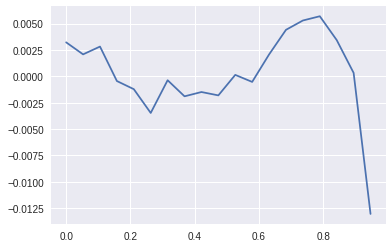

In [270]:
plt.plot(bins[0:len(corr)],corr, '-')

- Para nuestros datos. Intentamos primero con PSF.

**PSF**

In [325]:
dataPSF = file[file['type'] == 'PSF']
X = np.array([dataPSF['dec'],dataPSF['ra']]).T
len(X)

2287

In [326]:
minimo = 0
maximo = 1
bins = np.linspace(minimo, maximo, 30)
corr = two_point(X, bins)
#np.allclose(corr, 0, atol=0.02)

corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap=5)
#np.allclose(corr, 0, atol=2 * dcorr)

Text(0, 0.5, '$\\epsilon(r)*r$')

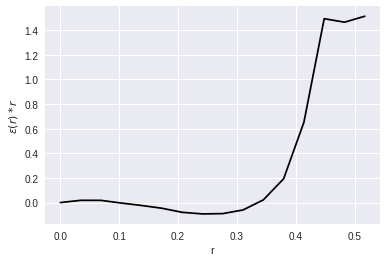

In [327]:
plt.plot(bins[0:len(corr)],bins[0:len(corr)]*corr, 'k-')
plt.xlabel('r')
plt.ylabel('$\epsilon(r)*r$')

**REX**

Text(0, 0.5, '$\\epsilon(r)*r$')

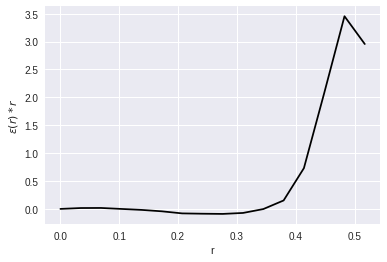

In [328]:
minimo = 0
maximo = 1
bins = np.linspace(minimo, maximo, 30)

dataPSF = file[file['type'] == 'REX']
X = np.array([dataPSF['dec'],dataPSF['ra']]).T

corr = two_point(X, bins)

corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap=5)

plt.plot(bins[0:len(corr)],bins[0:len(corr)]*corr, 'k-')
plt.xlabel('r')
plt.ylabel('$\epsilon(r)*r$')

**DEV**

Text(0, 0.5, '$\\epsilon(r)*r$')

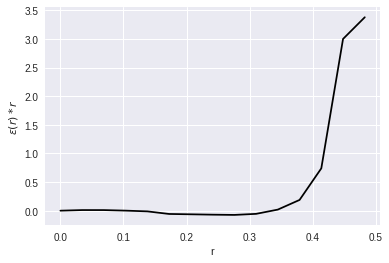

In [329]:
minimo = 0
maximo = 1
bins = np.linspace(minimo, maximo, 30)

dataPSF = file[file['type'] == 'DEV']
X = np.array([dataPSF['dec'],dataPSF['ra']]).T

corr = two_point(X, bins)

corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap=5)

plt.plot(bins[0:len(corr)],bins[0:len(corr)]*corr, 'k-')
plt.xlabel('r')
plt.ylabel('$\epsilon(r)*r$')

**EXP**

Text(0, 0.5, '$\\epsilon(r)*r$')

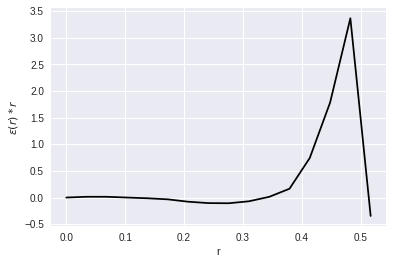

In [330]:
minimo = 0
maximo = 1
bins = np.linspace(minimo, maximo, 30)

dataPSF = file[file['type'] == 'EXP']
X = np.array([dataPSF['dec'],dataPSF['ra']]).T

corr = two_point(X, bins)

corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap=5)

plt.plot(bins[0:len(corr)],bins[0:len(corr)]*corr, 'k-')
plt.xlabel('r')
plt.ylabel('$\epsilon(r)*r$')

**COMP**

Text(0, 0.5, '$\\epsilon(r)*r$')

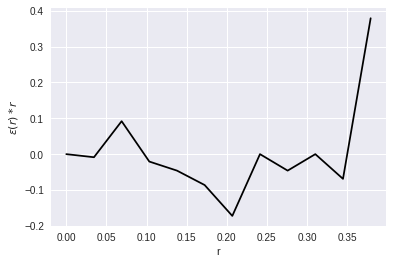

In [331]:
minimo = 0
maximo = 1
bins = np.linspace(minimo, maximo, 30)

dataPSF = file[file['type'] == 'COMP']
X = np.array([dataPSF['dec'],dataPSF['ra']]).T

corr = two_point(X, bins)

corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap=5)

plt.plot(bins[0:len(corr)],bins[0:len(corr)]*corr, 'k-')
plt.xlabel('r')
plt.ylabel('$\epsilon(r)*r$')

Notamos que sí tiene un cierto parecido con las correlaciones que anteriormente habíamos calculado para cada tipo, aunque éstas se ven un poco más continuas que discretas. Incluso el tipo 'EXP' se queda muy cercana a cero y luego se observa un pico, que es lo mismo que sucede con la que yo había calculado. 

-------------------------------------------------

### **Graficar las relaciones mag_z-mag_g, mag_g-mag_r,etc**

In [201]:
notNAN = file2.dropna(subset=['mag_g']) # Drop nan type
notNAN = notNAN.dropna(subset=['mag_z'])
notNAN = notNAN.dropna(subset=['mag_r'])
notNAN = notNAN.dropna(subset=['mag_w1'])
notNAN = notNAN.dropna(subset=['mag_w2'])

In [207]:
notNAN['r'] = notNAN['mag_r'].astype(float) # Convert to float
notNAN['g'] = notNAN['mag_g'].astype(float) # Convert to float
notNAN['mag_z'] = notNAN['mag_z'].astype(float) # Convert to float
notNAN['w1'] = notNAN['mag_w1'].astype(float) # Convert to float
notNAN['w2'] = notNAN['mag_w2'].astype(float) # Convert to float

In [208]:
notNAN['mag_z'] = notNAN['mag_z'].replace([np.inf, -np.inf], np.nan) # Replace infinity for -nan

In [209]:
notNAN = notNAN.dropna(subset=['mag_z'])

In [211]:
notNAN['mag_z']

1       17.9660
4       19.0220
19      21.3010
21      21.1726
22      23.3884
         ...   
4983    20.7456
4984    24.2723
4991    21.1830
4992    23.9620
4994    22.0309
Name: mag_z, Length: 1582, dtype: float64

In [212]:
mag_r = notNAN['r']
mag_g = notNAN['g']
mag_z = notNAN['mag_z']
mag_w1 = notNAN['w1']
mag_w2 = notNAN['w2']

Intentamos graficar algunas diferencias entre magnitudes:

In [215]:
alles = np.array([mag_r, mag_g, mag_z, mag_w1, mag_w2])
alles[0]-alles[1]

array([-0.249 , -0.6637, -0.4621, ..., -0.8631, -0.1677, -0.2876])

In [223]:
labels = np.array(['mag_r', 'mag_g', 'mag_z', 'mag_w1', 'mag_w2'])

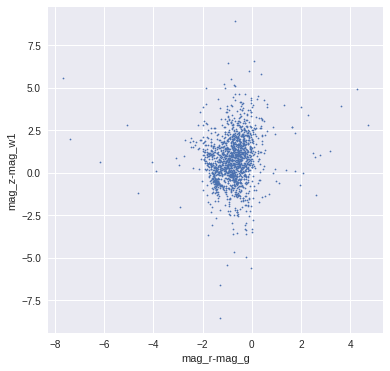

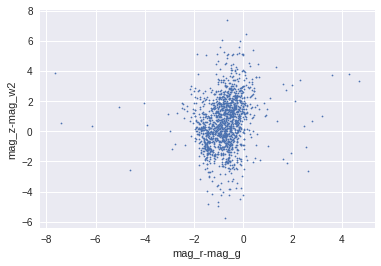

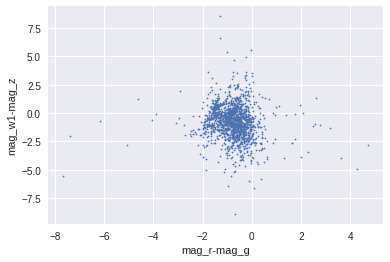

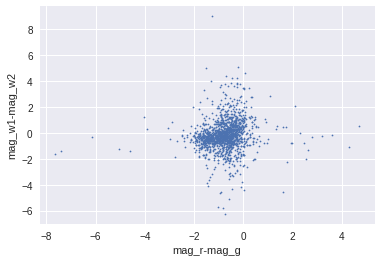

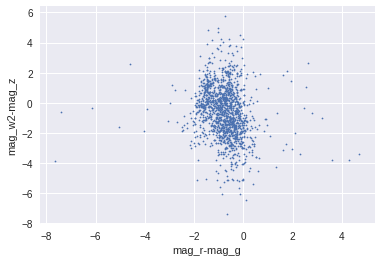

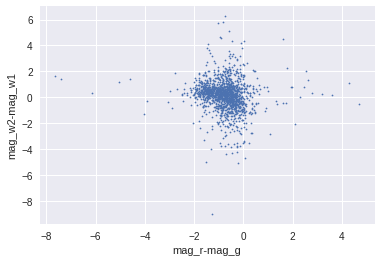

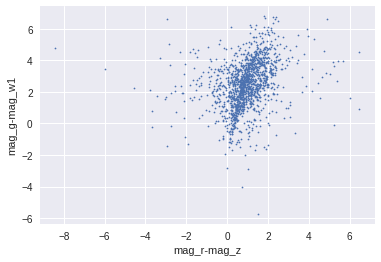

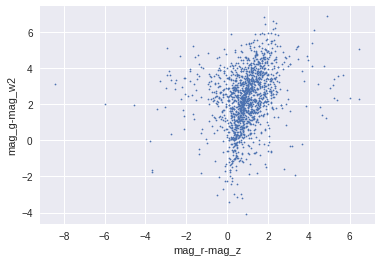

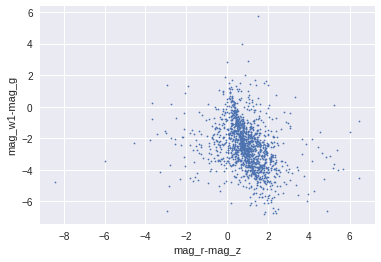

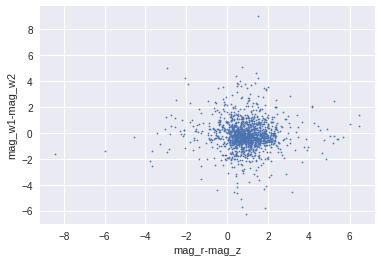

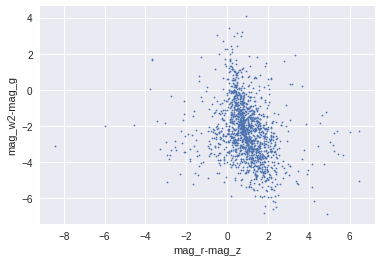

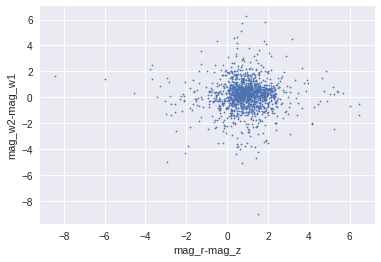

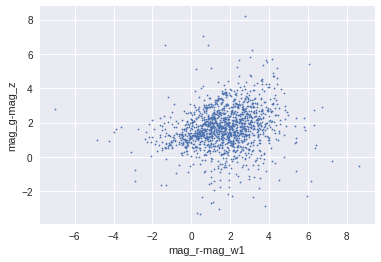

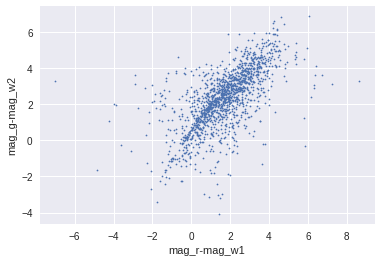

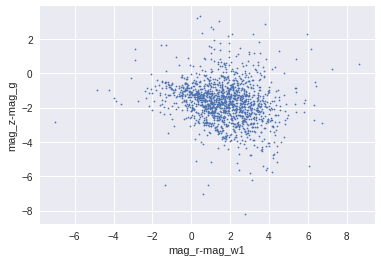

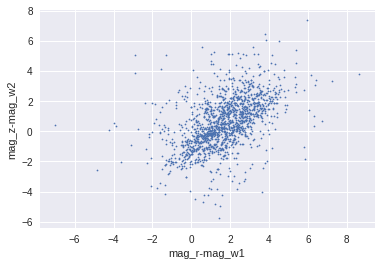

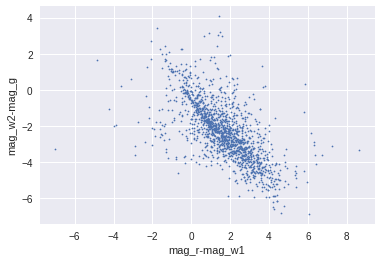

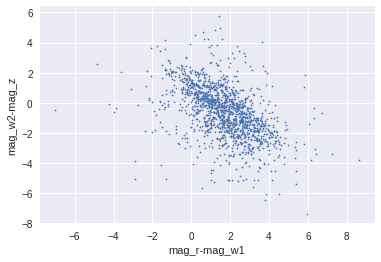

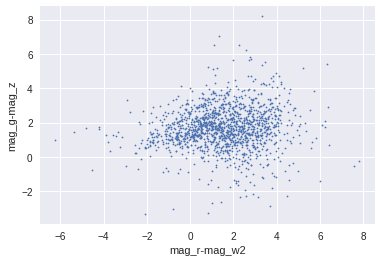

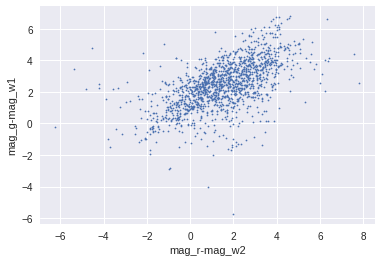

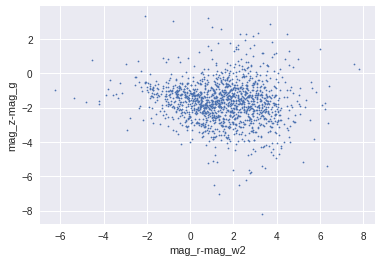

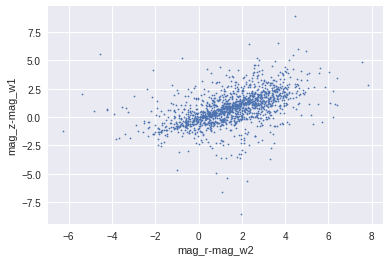

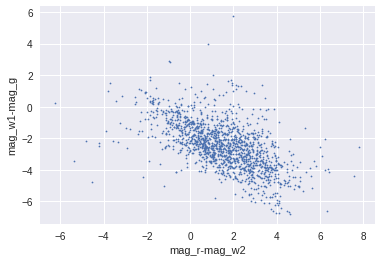

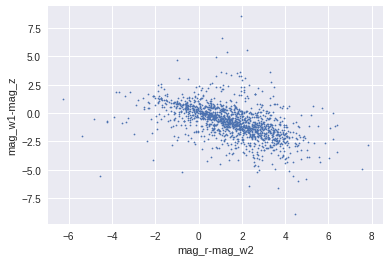

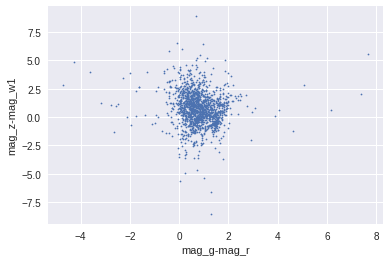

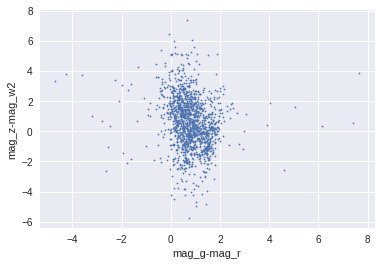

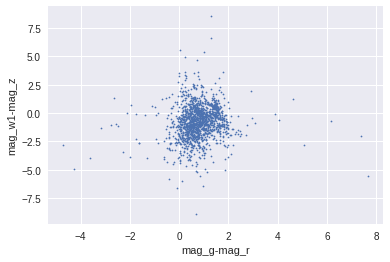

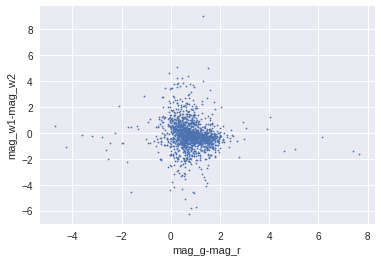

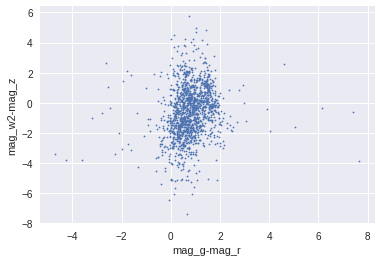

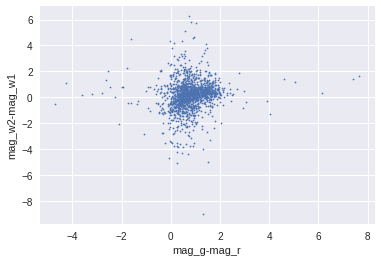

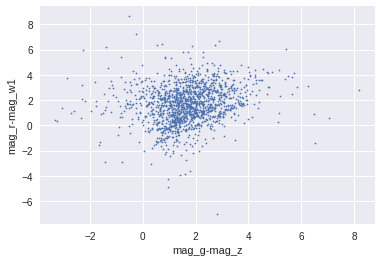

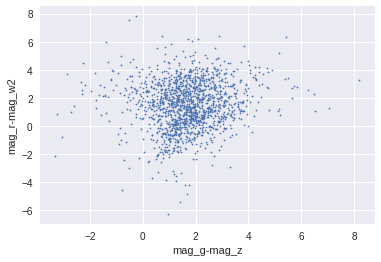

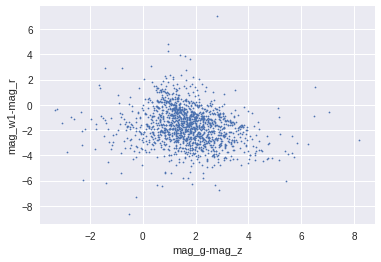

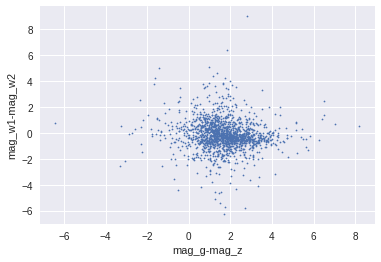

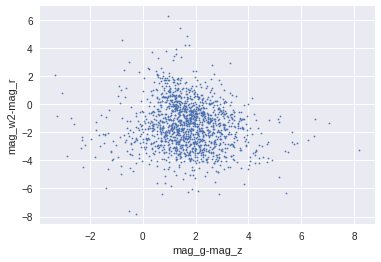

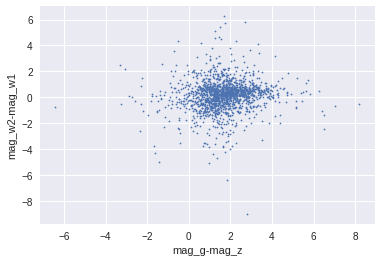

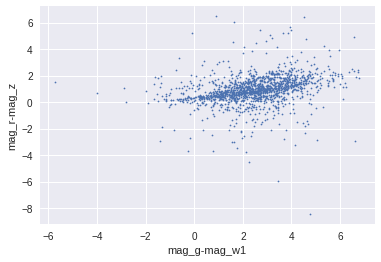

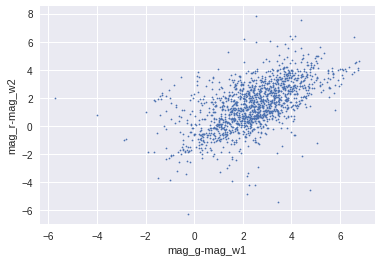

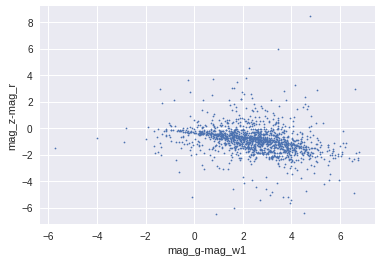

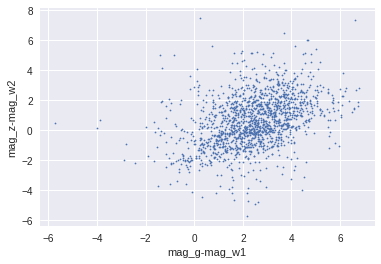

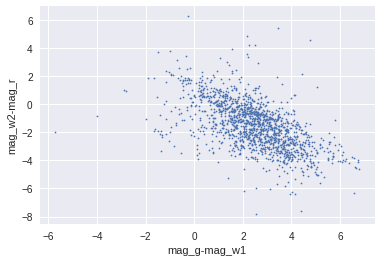

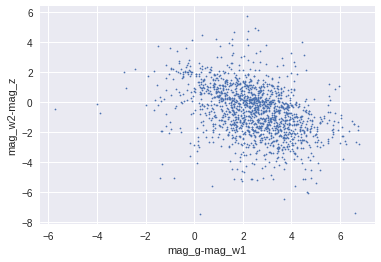

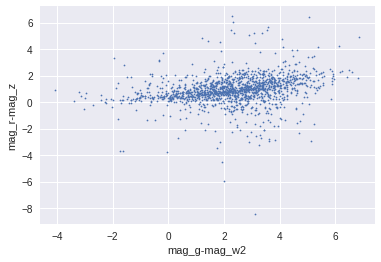

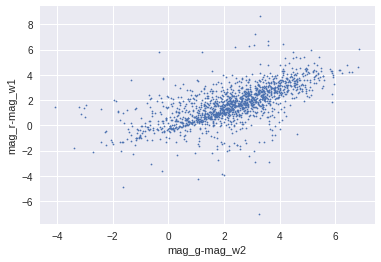

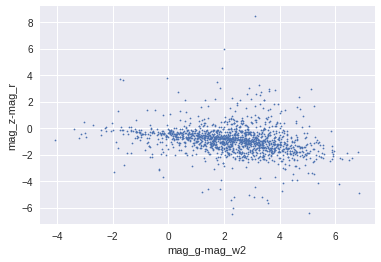

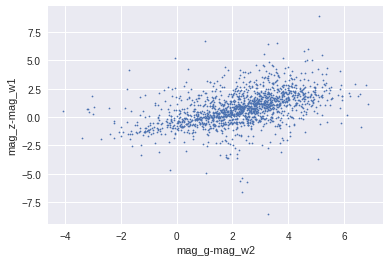

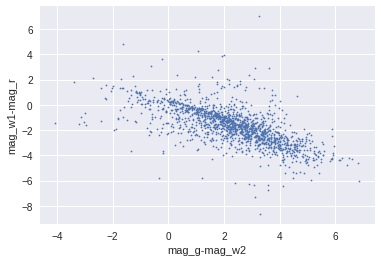

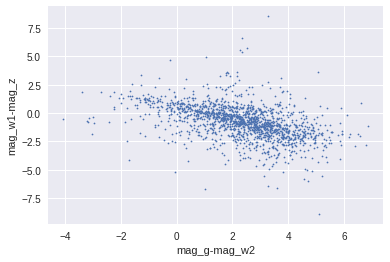

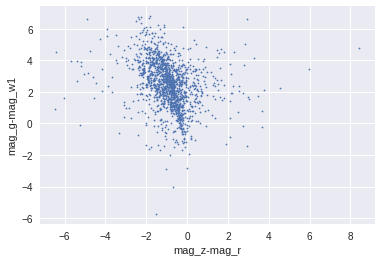

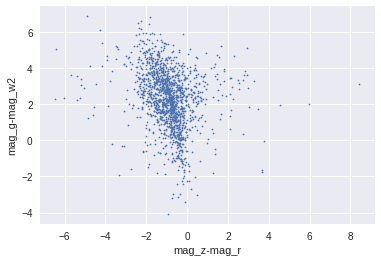

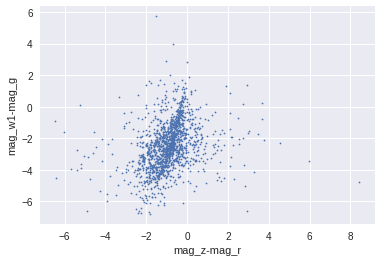

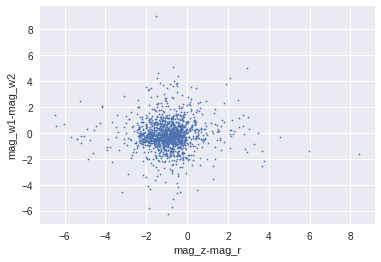

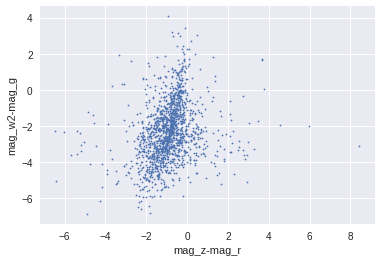

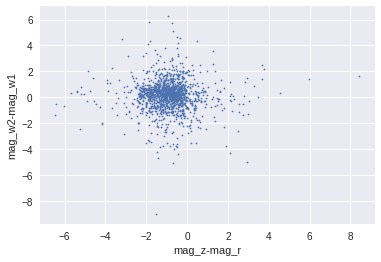

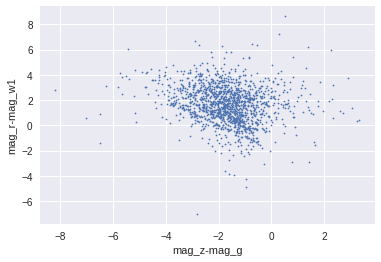

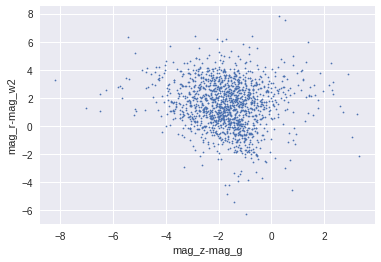

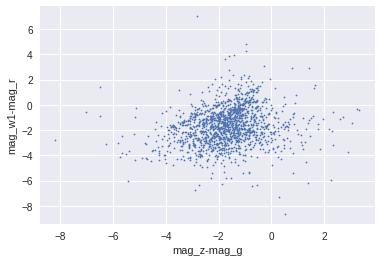

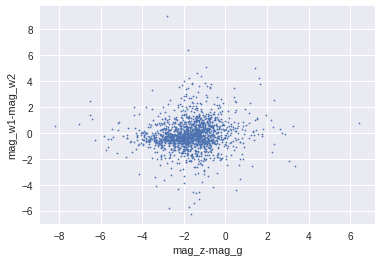

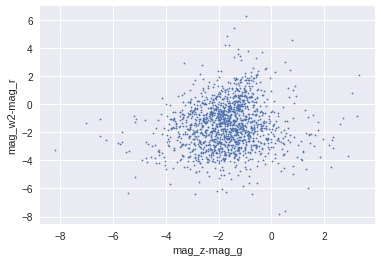

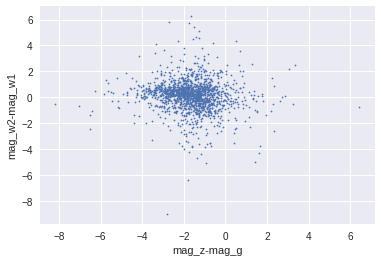

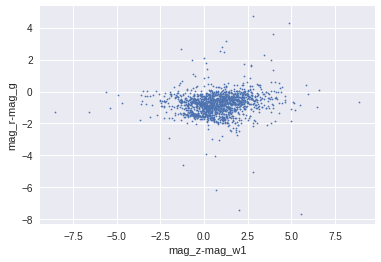

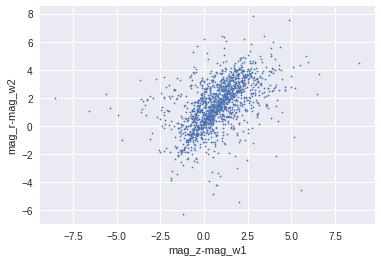

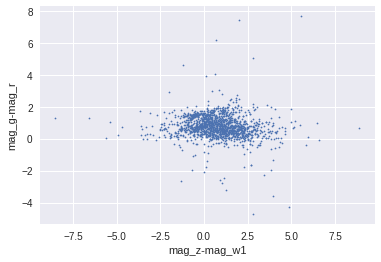

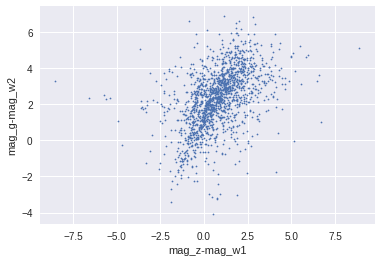

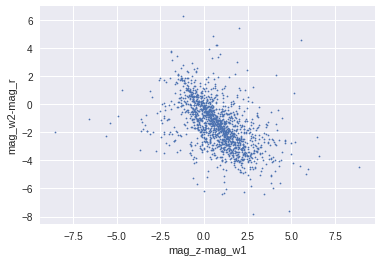

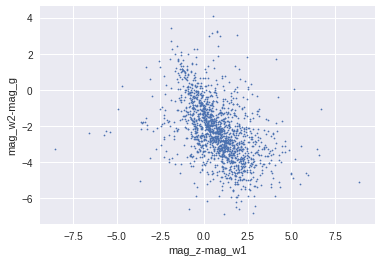

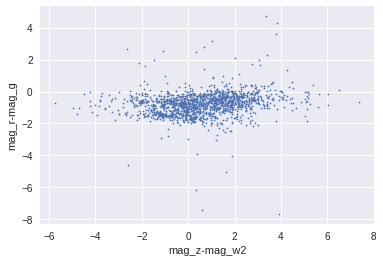

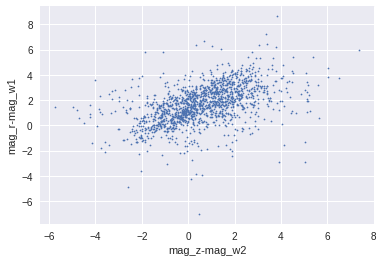

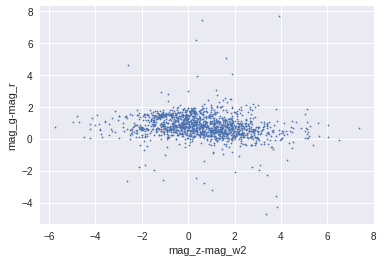

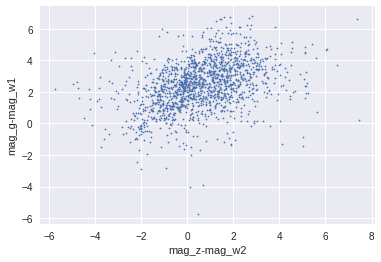

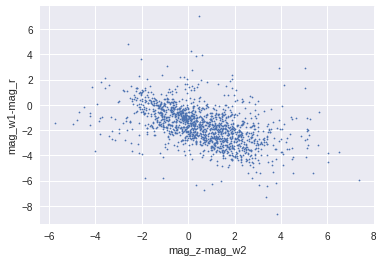

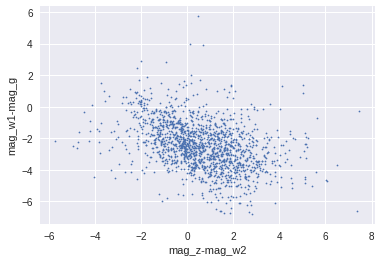

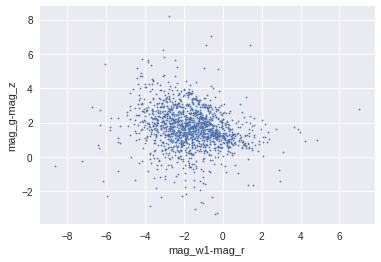

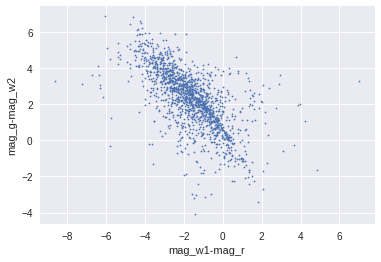

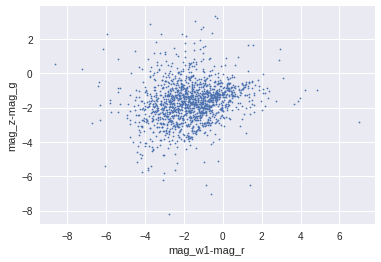

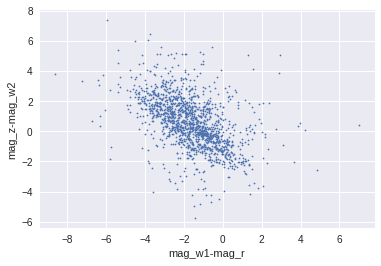

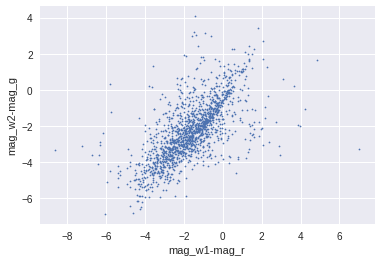

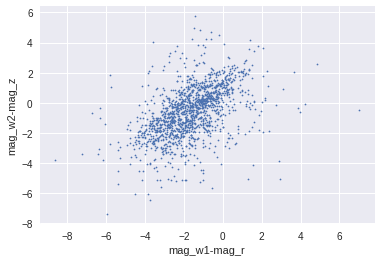

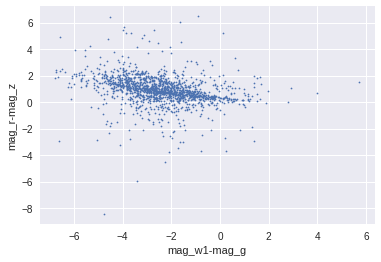

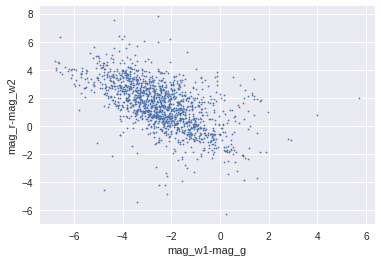

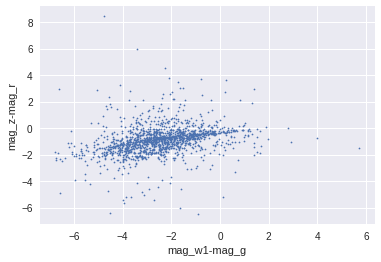

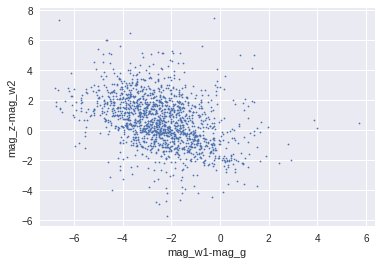

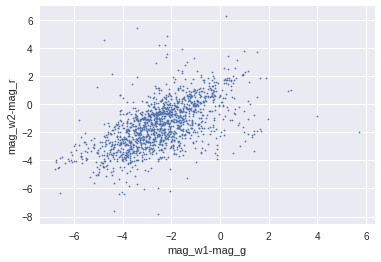

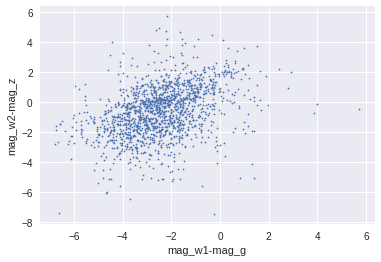

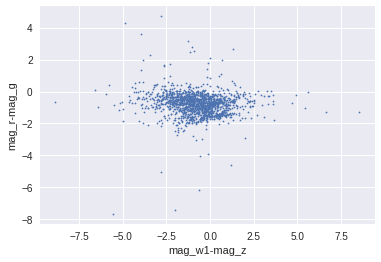

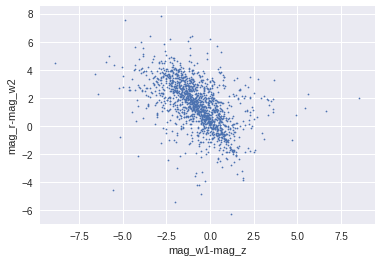

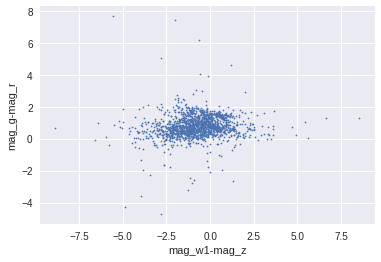

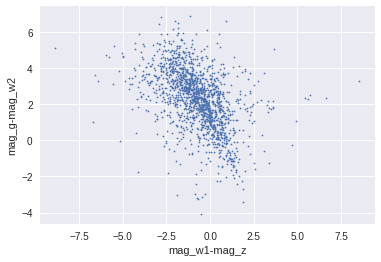

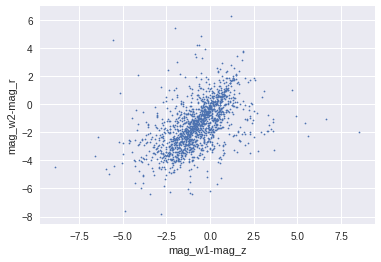

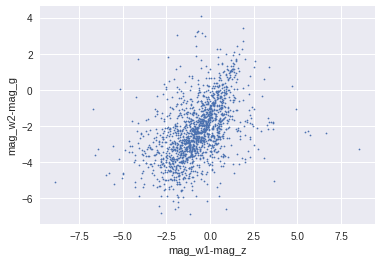

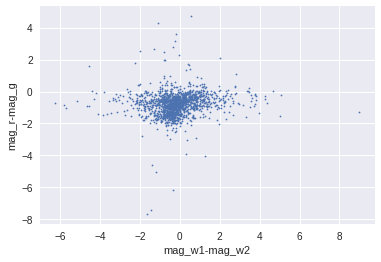

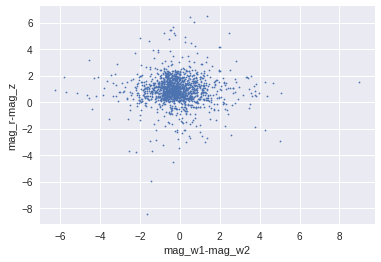

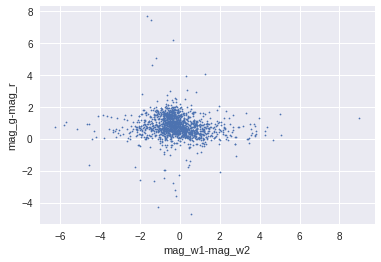

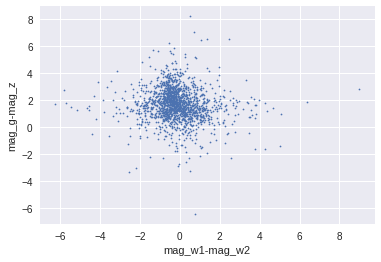

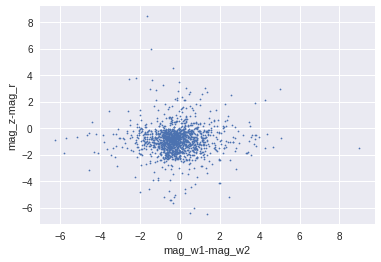

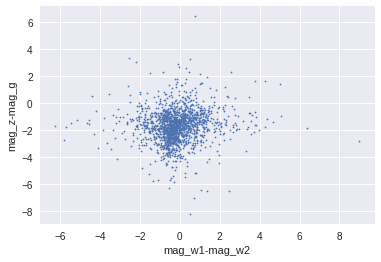

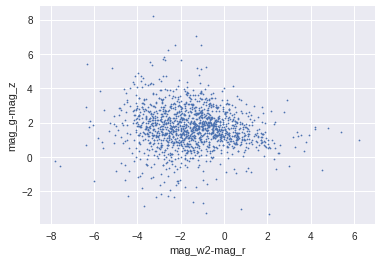

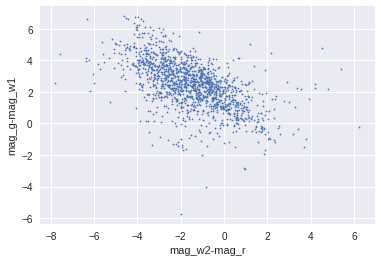

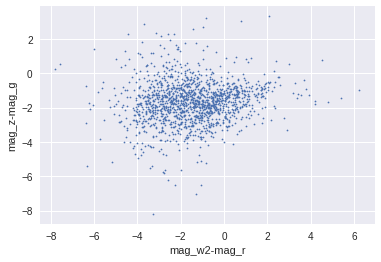

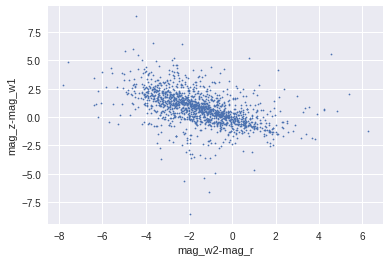

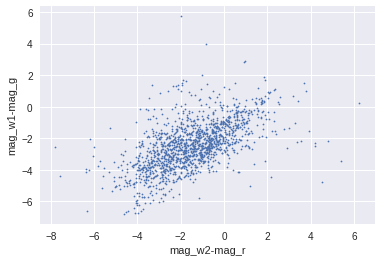

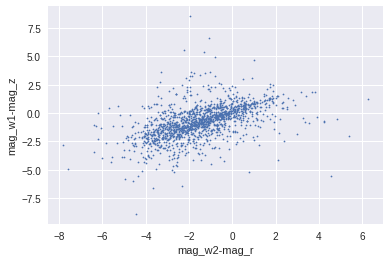

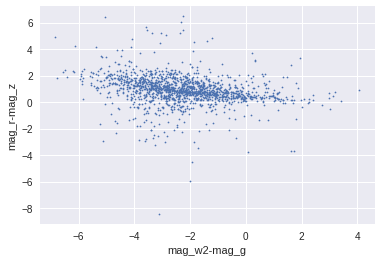

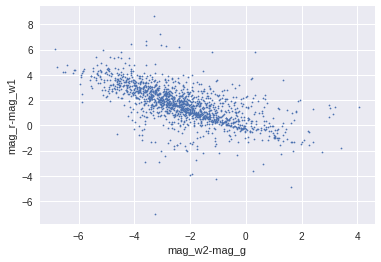

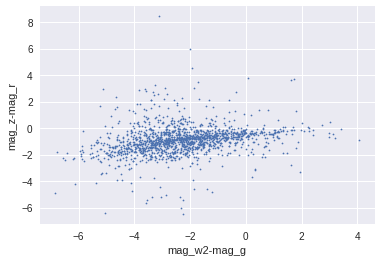

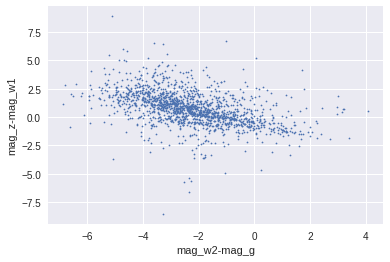

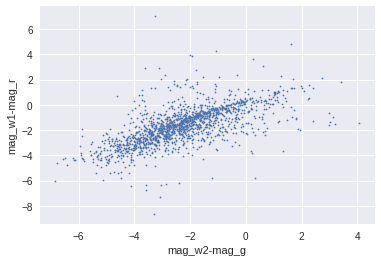

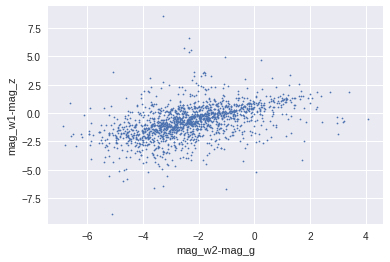

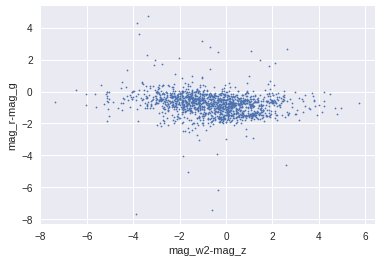

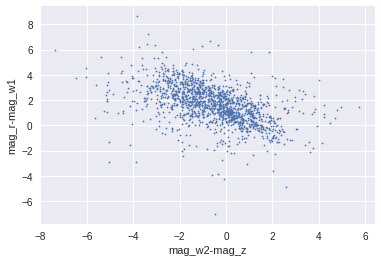

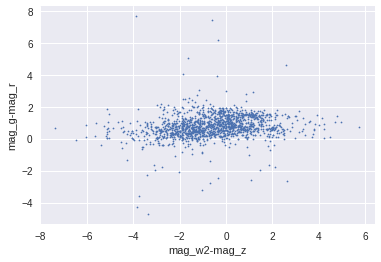

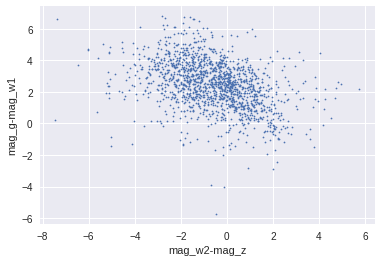

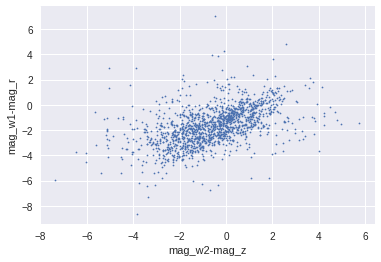

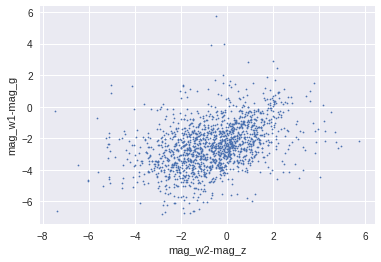

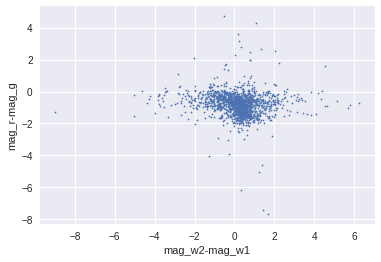

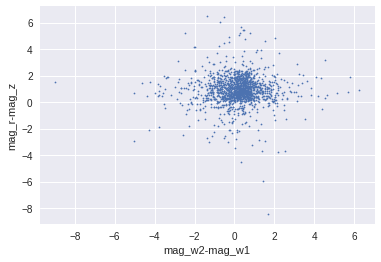

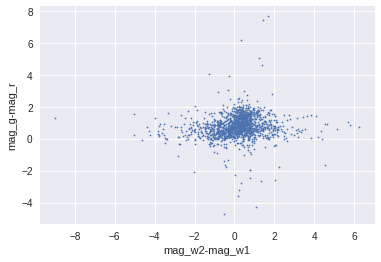

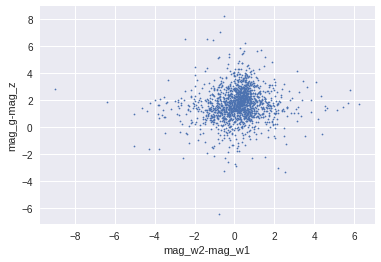

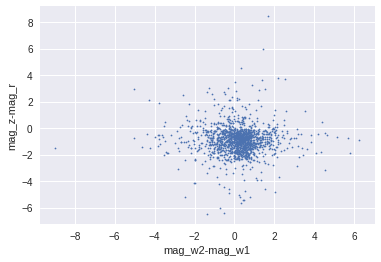

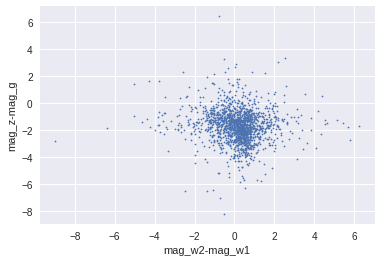

In [234]:
plt.figure(figsize = (6,6))

for i in range(len(alles)):
    for j in range(len(alles)):
        for k in range(len(alles)):
            for l in range(len(alles)):
                if( i != j  and j != k and k!= l and l != i and i!=k and j!=l):
                    plt.plot(alles[i]-alles[j], alles[k]-alles[l], 'p', markersize = 2)
                    plt.xlabel(labels[i] + str('-') + labels[j])
                    plt.ylabel(labels[k] + str('-') + labels[l])
                    plt.show()